# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [151]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns


## EDA:

In [152]:
# Load Data
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [153]:
df.shape

(768, 9)

In [154]:
df.info()
# There are no duplicated values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [155]:
df.duplicated().sum()
# There are no duplicated rows

0

In [156]:
# Exploring thw relationship between variables using Pearson's correlation Coefficient
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

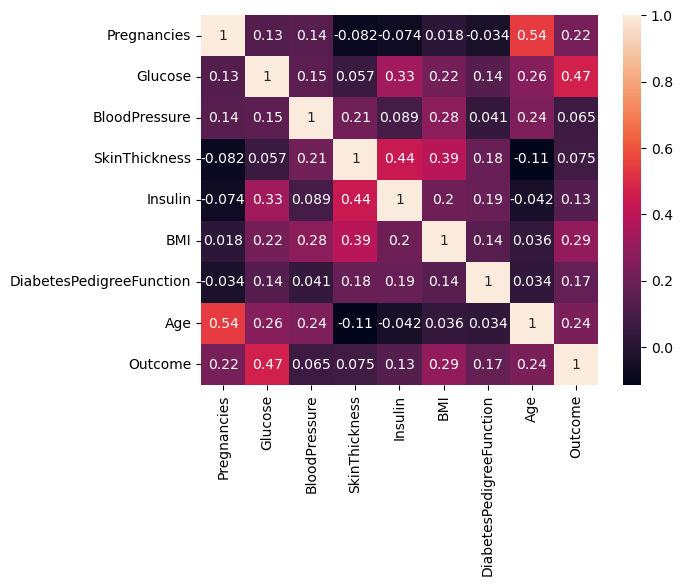

In [157]:
sns.heatmap(df.corr(), annot=True)

In [158]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [159]:
df['Pregnancies'].value_counts(sort=True)

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

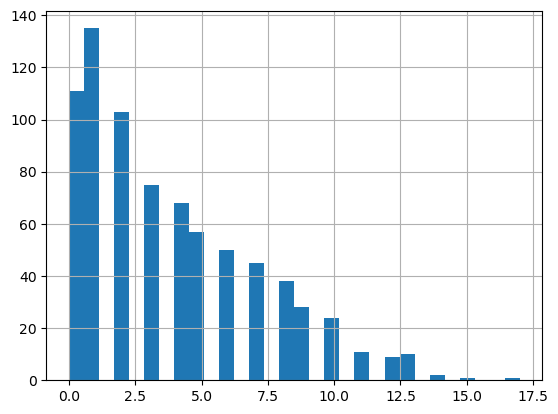

In [160]:
df['Pregnancies'].hist(bins=30)
plt.show()

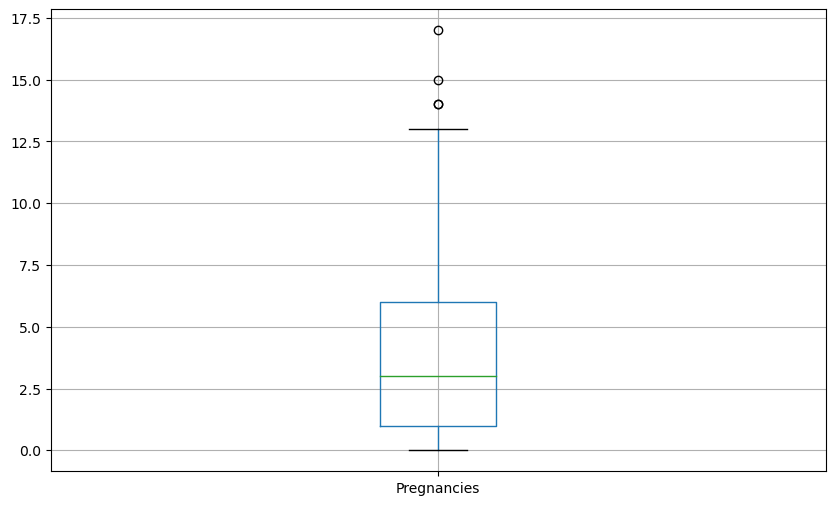

There are 14 pregancy values as outliers


In [161]:

#Box Plots to Confirm Outliers - Pregnancies:
# Pregnancies
plt.figure(figsize=(10, 6))
df.boxplot(column=['Pregnancies'])
plt.show()

# Pregnancy Outliers
preg_outlier_count = df[df['Pregnancies'] >= 13].value_counts().sum()
print(f'There are {preg_outlier_count} pregancy values as outliers')

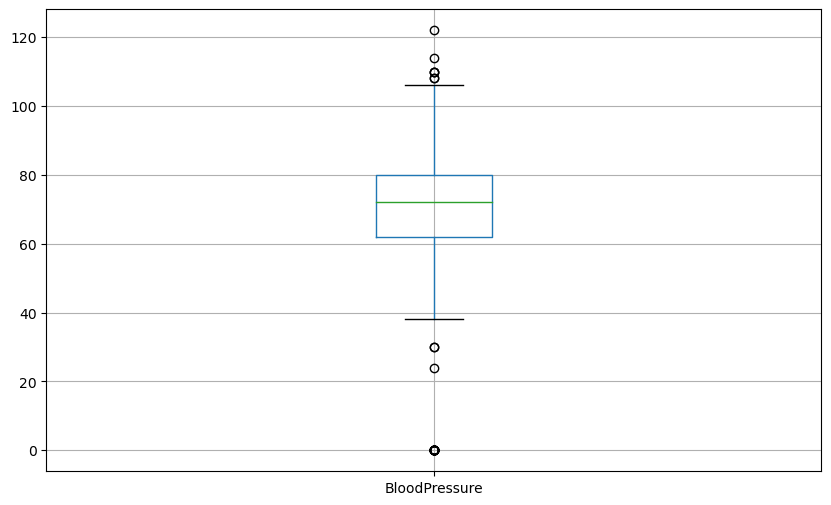

In [162]:

#Box plot to confirm outliers - Blood Pressure
# Pregnancies
plt.figure(figsize=(10, 6))
df.boxplot(column=['BloodPressure'])
plt.show()


In [163]:
#Blood Pressure Outlier count.
bp_outliers_count = ((df['BloodPressure'] < 40) | (df['BloodPressure'] > 105)).sum()
bp_outliers_count

49

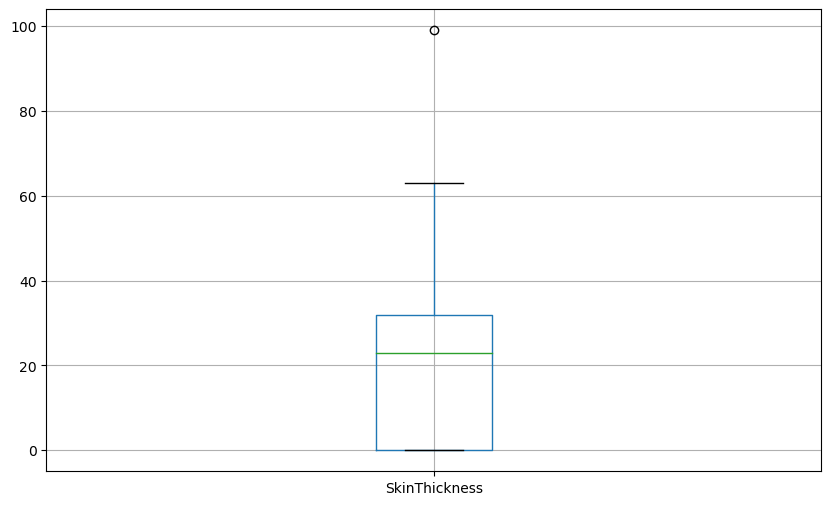

In [164]:
# Box Plot of Skin Thickness:
# Pregnancies
plt.figure(figsize=(10, 6))
df.boxplot(column=['SkinThickness'])
plt.show()

In [165]:
#Skin Thickness Outliers
skin_thickness_outlier_count = ((df['SkinThickness'] < 23) | (df['SkinThickness'] > 60)).sum()
skin_thickness_outlier_count

379

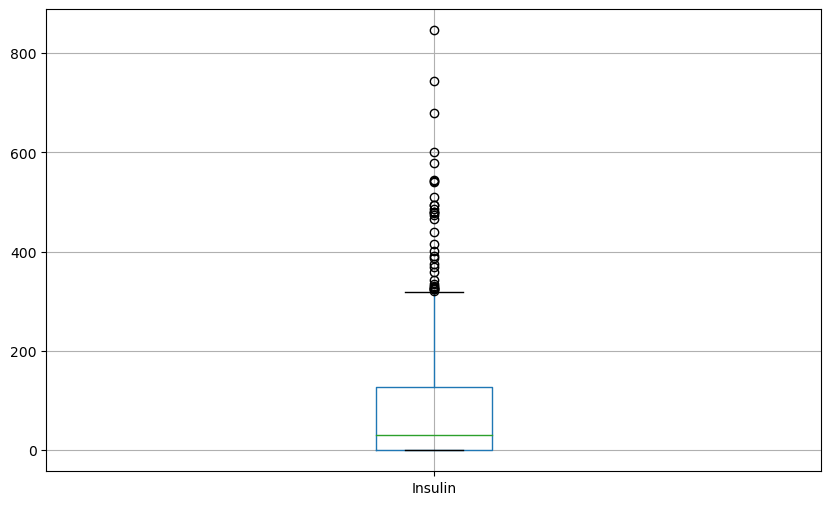

In [166]:
#Box Plots to Confirm Outliers - Insulin:

# Create a box plot
plt.figure(figsize=(10, 6))
df.boxplot(column=['Insulin'])
plt.show()
#The range is too varried to use Box and Whisker to determin outliers. Or that there isn't any major outliers in this category except for those really above 600.




In [167]:
insulin_outliers_count = ((df['Insulin'] == 0) | (df['Insulin'] > 600)).sum()
insulin_outliers_count

377

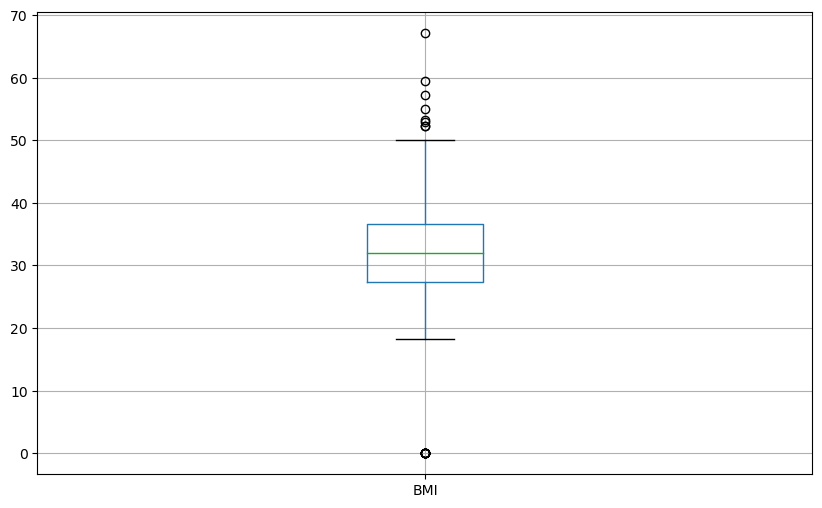

In [168]:
# Box plot to see outlies - BMI
plt.figure(figsize=(10, 6))
df.boxplot(column=['BMI'])
plt.show()


In [169]:
bmi_outlier_count = (df['BMI'] == 0).sum()
bmi_outlier_count

11

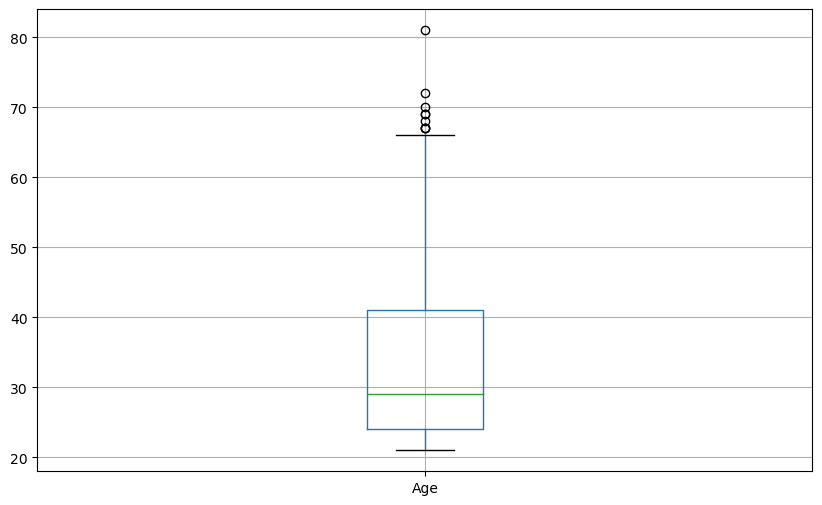

In [170]:
# Outlier Detection  - Age
plt.figure(figsize=(10, 6))
df.boxplot(column=['Age'])
plt.show()

# There are outliers, but it is not inconceivable. A patient can have an age of 80. Its not as though his age was 120 or 130 which is nearly impossible

In [187]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.342046,26.487990,79.799479,32.450805,33.240885,0.348958
std,3.369578,31.972618,11.864368,9.144083,115.244002,6.875374,11.760232,0.476951
min,0.000000,0.000000,45.000000,7.000000,0.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,0.000000,27.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,50.000000,846.000000,67.100000,81.000000,1.000000


In [172]:
# Splitting the Dataframe into two groups. One with diabetes and one without diabetes
grouped_df = df.groupby('Outcome')

# Set the display options to show more columns
pd.set_option('display.max_rows', None)  # This line will allow you to see all columns.

# Assuming 'df' is your DataFrame
grouped_df = df.groupby('Outcome')
grouped_df.describe().T

Outcome                                  0           1
Pregnancies              count  500.000000  268.000000
                         mean     3.298000    4.865672
                         std      3.017185    3.741239
                         min      0.000000    0.000000
                         25%      1.000000    1.750000
                         50%      2.000000    4.000000
                         75%      5.000000    8.000000
                         max     13.000000   17.000000
Glucose                  count  500.000000  268.000000
                         mean   109.980000  141.257463
                         std     26.141200   31.939622
                         min      0.000000    0.000000
                         25%     93.000000  119.000000
                         50%    107.000000  140.000000
                         75%    125.000000  167.000000
                         max    197.000000  199.000000
BloodPressure            count  500.000000  268.000000
                         mean    68.184000   70.824627
                         std     18.063075   21.491812
                         min      0.000000    0.000000
                         25%     62.000000   66.000000
                         50%     70.000000   74.000000
                         75%     78.000000   82.000000
                         max    122.000000  114.000000
SkinThickness            count  500.000000  268.000000
                         mean    19.664000   22.164179
                         std     14.889947   17.679711
                         min      0.000000    0.000000
                         25%      0.000000    0.000000
                         50%     21.000000   27.000000
                         75%     31.000000   36.000000
                         max     60.000000   99.000000
Insulin                  count  500.000000  268.000000
                         mean    68.792000  100.335821
                         std     98.865289  138.689125
                         min      0.000000    0.000000
                         25%      0.000000    0.000000
                         50%     39.000000    0.000000
                         75%    105.000000  167.250000
                         max    744.000000  846.000000
BMI                      count  500.000000  268.000000
                         mean    30.304200   35.142537
                         std      7.689855    7.262967
                         min      0.000000    0.000000
                         25%     25.400000   30.800000
                         50%     30.050000   34.250000
                         75%     35.300000   38.775000
                         max     57.300000   67.100000
DiabetesPedigreeFunction count  500.000000  268.000000
                         mean     0.429734    0.550500
                         std      0.299085    0.372354
                         min      0.078000    0.088000
                         25%      0.229750    0.262500
                         50%      0.336000    0.449000
                         75%      0.561750    0.728000
                         max      2.329000    2.420000
Age                      count  500.000000  268.000000
                         mean    31.190000   37.067164
                         std     11.667655   10.968254
                         min     21.000000   21.000000
                         25%     23.000000   28.000000
                         50%     27.000000   36.000000
                         75%     37.000000   44.000000
                         max     81.000000   70.000000

In [ ]:
df['Pregnancies'].value_counts()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [174]:
# Start by dropping the PedigreeFunction
df.drop(columns='DiabetesPedigreeFunction', inplace=True)

In [175]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


### HANDLING OUTLIERS & MISSING VALUES

In [196]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.342046,26.487990,79.799479,32.450805,33.240885,0.348958
std,3.369578,30.436016,11.864368,9.144083,115.244002,6.875374,11.760232,0.476951
min,0.000000,44.000000,45.000000,7.000000,0.000000,18.200000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,0.000000,27.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,50.000000,846.000000,67.100000,81.000000,1.000000


### BMI:

In [177]:
# Replacing 'zeros' in BMI
BMI_zero_count = (df['BMI'] == 0).sum()
BMI_zero_count # 11 BMI values are 0

df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())


In [178]:
df['BMI'].describe() #Sanity check 

count    768.000000
mean      32.450805
std        6.875374
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

### Blood Pressure:

In [179]:
# Replacing BloodPressure 'zeros'
bp_zero_count = (df['BloodPressure'] == 0).sum()
bp_zero_count

df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())

In [180]:
(df['BloodPressure'] < 45).sum() # 9 records of BloodPressure being lower than 45. 

#Replace the BloodPressure values that are lower than 45 with 45 exactly.
df.loc[df['BloodPressure'] < 45, 'BloodPressure'] = 45

In [181]:
#Replacing the High Blood Pressure patients
high_bp_count = (df['BloodPressure'] > 110).sum()
high_bp_count


2

### Skin Thickness:

In [182]:
df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [183]:
# Replacing Skin Thickness 'zeros':
skin_thickness_zero_count = (df['SkinThickness'] == 0).sum()
skin_thickness_zero_count #227 records with 0s

#replace the 227 records with the mean
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())


In [184]:
#How many records are high
skin_thickness_high_count = (df['SkinThickness'] > 50).sum()
skin_thickness_high_count

df.loc[df['SkinThickness'] > 50, 'SkinThickness'] = 50

In [185]:
df['SkinThickness'].describe()

count    768.000000
mean      26.487990
std        9.144083
min        7.000000
25%       20.536458
50%       23.000000
75%       32.000000
max       50.000000
Name: SkinThickness, dtype: float64

### Glucose:

In [189]:
# Glucose zero count
glucose_zero_count = (df['Glucose'] == 0).sum()
glucose_zero_count # 5 records with 0

#Replace '0's with the column mean
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())

In [194]:
# High Glucose count
glucose_high_count = (df['Glucose'] > 155).sum()
glucose_high_count # 117 records

117

### Insulin:

In [197]:
#Insulin zero count
insulin_zero_count = (df['Insulin']==0).sum()
insulin_zero_count # 374 records with a zero insulin level

# Replacing them with the mean
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean()) 

In [198]:
df['Insulin'].describe()

count    768.000000
mean     118.660163
std       93.080358
min       14.000000
25%       79.799479
50%       79.799479
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

### SCALING AND NORMALIZATION:

In [205]:
#saving a copy before doing any major transformations so I can return incase of any issues
clean_copy_df = df.copy() 

In [ ]:
clean_copy_df.describe()
df.describe()

In [213]:
grouped_df['Outcome'].value_counts()
#It is an imbalanced dataset.

Outcome
0    500
1    268
Name: count, dtype: int64

In [218]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=44)


In [221]:
X_train.shape, y_train.shape #Sanity check

((614, 7), (614,))

In [224]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale = StandardScaler()


In [225]:
#Fit and transform the training data
X_train_scaled = scale.fit_transform(X_train)

#Only transform the test datas
X_test_scaled = scale.transform(X_test)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
rfc = RandomForestClassifier()



In [227]:
# Training Logistic Regression
lr.fit(X_train, y_train)

# Training Random Forest Classifier
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [228]:
# Predictions with Logistic Regression
lr_predictions = lr.predict(X_test)

# Predictions with Random Forest Classifier
rfc_predictions = rfc.predict(X_test)

In [231]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluating accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)
rfc_accuracy = accuracy_score(y_test, rfc_predictions)

# Precision Score
lr_precision = precision_score(y_test, lr_predictions)
rfc_precision = precision_score(y_test, rfc_predictions)

#Recall Score
lr_recall = recall_score(y_test, lr_predictions)
rfc_recall = recall_score(y_test, rfc_predictions)

#F1 Score
lr_f1_score = f1_score(y_test, lr_predictions)
rfc_f1_score = f1_score(y_test, rfc_predictions)

#ROC AUC Score
lr_roc_auc_score = roc_auc_score(y_test, lr_predictions)
rfc_roc_auc_score = roc_auc_score(y_test, rfc_predictions)

print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Logistic Regression Precision: {lr_precision}")
print(f"Logistic Regression Recall: {lr_recall}")
print(f"Logistic Regression f1_score: {lr_f1_score}")
print(f"Logistic Regression ROC AUC Score: {lr_roc_auc_score}")


print(f"Random Forest Classifier Accuracy: {rfc_accuracy}")
print(f"Random Forest Classifier Precision: {rfc_precision}")
print(f"Random Forest Classifier Recall: {rfc_recall}")
print(f"Random Forest Classifier f1_score: {rfc_f1_score}")
print(f"Random Forest Classifier ROC AUC Score: {rfc_roc_auc_score}")

Logistic Regression Accuracy: 0.7597402597402597
Logistic Regression Precision: 0.7073170731707317
Logistic Regression Recall: 0.5370370370370371
Logistic Regression f1_score: 0.6105263157894738
Logistic Regression ROC AUC Score: 0.7085185185185187
Random Forest Classifier Accuracy: 0.7467532467532467
Random Forest Classifier Precision: 0.7027027027027027
Random Forest Classifier Recall: 0.48148148148148145
Random Forest Classifier f1_score: 0.5714285714285714
Random Forest Classifier ROC AUC Score: 0.6857407407407407


In [232]:
from sklearn.model_selection import GridSearchCV

lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
best_lr = grid_search.best_estimator_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zachrosenthal/anac

In [233]:
#Logistic Regression Best Paramters
print("Best Estimator Parameters:")
print(best_lr)

Best Estimator Parameters:
LogisticRegression(C=0.01, solver='newton-cg')


In [236]:
from sklearn.model_selection import GridSearchCV

#Tuning Random Forest with GridSearchCV
rfc_param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
}


grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rfc = grid_search.best_estimator_

/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_par

In [237]:
#Random Forest Best Paramters
print("Best Estimator Parameters:")
print(best_rfc)

Best Estimator Parameters:
RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5)


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. The Logistic Regression model, the simpler classifier, achieved an accuracy of 75.97%, a precision of 70.73%, and an ROC AUC score of 70.85%, indicating relatively high effectiveness for a binary classification task.

2. The Random Forest Classifier, chosen as the ensemble method, demonstrated slightly lower performance metrics with an accuracy of 74.68%, a precision of 70.27%, and an ROC AUC score of 68.57%, suggesting that the ensemble method may require further parameter tuning to optimize its predictive power. I tried at one point to use even more paramters in the parameter grid for the grid search but it reached over 15 minutes of run time and so I decided to interupt it and simplify the demand because I honestly got inpatient and it was late. So definitely something to be aware of in the future

3. The preprocessing phase, including addressing outliers and replacing zero values with meaningful statistics, was useful for model training. The use of StandardScaler to standardize the data, despite the similar magnitudes, proved beneficial for the performance of the algorithms. 

4. The imbalanced nature of the dataset was countered by using the stratify parameter during the train-test split, ensuring representative sampling for both classes in the training and testing sets.